## Edge Detection

In [15]:
# This code was based on:
# https://opencv.org/blog/edge-detection-using-opencv/

import cv2
import numpy as np
from matplotlib import pyplot as plt

image_file = './images/bev02.jpg'
SHOW_OPENCV = False


## Sobel

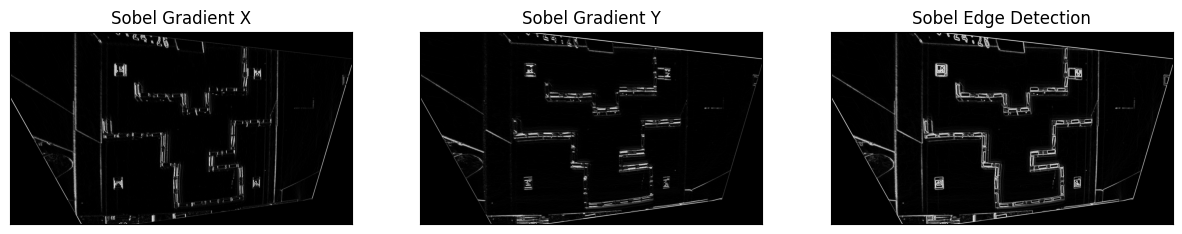

In [16]:

#################  SOBEL ###############

'''
Arguments
src: Input image (should be grayscale for edge detection).
ddepth: Desired depth of the output image (e.g., CV_64F allows negative gradients).
dx: Order of the derivative in the x-direction (set to 1 to detect horizontal changes).
dy: Order of the derivative in the y-direction (set to 1 to detect vertical changes).
ksize: Size of the extended Sobel kernel (must be odd: 1, 3, 5, 7; use 1 for Scharr operator).
'''
# Load image in grayscale
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

img = cv2.GaussianBlur(img,(3,3),0)

# Apply Sobel operator
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Compute gradient magnitude
gradient_magnitude = cv2.magnitude(sobelx, sobely)

# Convert to uint8
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobel = cv2.convertScaleAbs(gradient_magnitude)


titles = ['Sobel Gradient X',
          'Sobel Gradient Y','Sobel Edge Detection',]
images = [sobelx,
          sobely,
          sobel]


fig = plt.figure(figsize=[15,30])
for i in range(3):
	plt.subplot(1,3,i+1)
	plt.imshow(images[i],'gray')
	plt.title(titles[i]), plt.xticks([]), plt.yticks([])



if SHOW_OPENCV == True:
	# Display result
	cv2.namedWindow("Sobel Gradient X",cv2.WINDOW_NORMAL)
	cv2.imshow("Sobel Gradient X", cv2.convertScaleAbs(sobelx))
	cv2.namedWindow("Sobel Gradient Y",cv2.WINDOW_NORMAL)
	cv2.imshow("Sobel Gradient Y", cv2.convertScaleAbs(sobely))
	cv2.namedWindow("Sobel Edge Detection",cv2.WINDOW_NORMAL)
	cv2.imshow("Sobel Edge Detection", gradient_magnitude)

## Laplacian

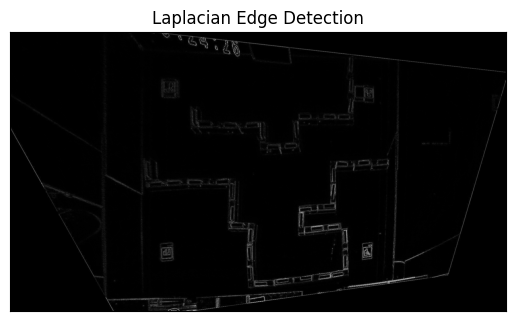

In [17]:
'''
Arguments
src: Input image (usually in grayscale).
ddepth: Desired depth of the output image (e.g., CV_64F to capture negative values).
ksize: Size of the Laplacian kernel (must be odd and positive; typically 1, 3, 5, or 7). Use ksize=1 to apply a 3×3 kernel without scaling.
'''
# Load image in grayscale
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

# Apply Laplacian operator
laplacian = cv2.Laplacian(img, cv2.CV_64F,5)

# Convert to uint8
laplacian_abs = cv2.convertScaleAbs(laplacian)

fig = plt.figure()
plt.imshow(laplacian_abs,'gray')
plt.title('Laplacian Edge Detection')
plt.xticks([]),plt.yticks([])


if SHOW_OPENCV == True:
	# Display result
	cv2.namedWindow("Laplacian Edge Detection",cv2.WINDOW_NORMAL)
	cv2.imshow("Laplacian Edge Detection", laplacian_abs)


## Canny

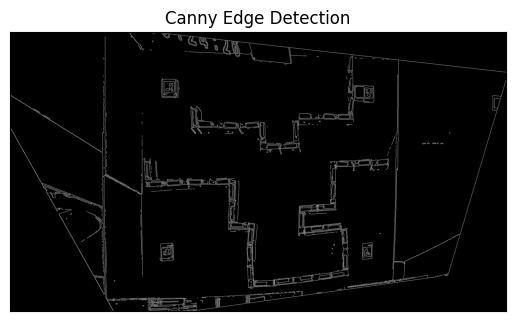

In [20]:
'''
Arguments
image: Input image (must be in grayscale).
threshold1: Lower boundary for the hysteresis thresholding.
threshold2: Upper boundary for the hysteresis thresholding.
'''

# Load image in grayscale
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

# Apply Gaussian Blur to reduce noise
img = cv2.GaussianBlur(img,(3,3),0)

# Apply Canny Edge Detector
canny = cv2.Canny(img, threshold1=80, threshold2=100)

fig = plt.figure()
plt.imshow(canny,'gray')
plt.title('Canny Edge Detection')
plt.xticks([]),plt.yticks([])
plt.show()

if SHOW_OPENCV == True:
  # Display result
  cv2.namedWindow("Canny Edge Detection",cv2.WINDOW_NORMAL)
  cv2.imshow("Canny Edge Detection", edges)
  cv2.waitKey(0)
  cv2.destroyAllWindows()